# Modeling2 Final Project
## Name: Jingwen Zhu


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [2]:
data = pd.read_csv("C:\\Users\\17855\\OneDrive\\Desktop\\Modeling2\\SydneyHousePrices.csv")
data

,Date,Id,suburb,postalCode,sellPrice,bed,bath,car,propType
0,2019-06-19,1,Avalon Beach,2107,1210000,4.0,2,2.0,house
1,2019-06-13,2,Avalon Beach,2107,2250000,4.0,3,4.0,house
2,2019-06-07,3,Whale Beach,2107,2920000,3.0,3,2.0,house
3,2019-05-28,4,Avalon Beach,2107,1530000,3.0,1,2.0,house
4,2019-05-22,5,Whale Beach,2107,8000000,5.0,4,4.0,house
...,...,...,...,...,...,...,...,...,...
199499,2014-06-20,199500,Illawong,2234,1900000,5.0,3,7.0,house
199500,2014-05-26,199501,Illawong,2234,980000,4.0,3,2.0,house
199501,2014-04-17,199502,Alfords Point,2234,850000,4.0,2,2.0,house
199502,2013-09-07,199503,Illawong,2234,640000,3.0,2,2.0,townhouse


#### Description of Data
There are 199504 samples with 9 variables in the dataset. Among the 9 variables, our objective is to predict the selling price of a house, so sellPrice is our target variable. The remaining 8 are independent variables. Among the 8 independent variables:

The Id variable is used to label the order information, which does not contribute to the classification and should be removed in the data preprocessing.

The propType, suburb and postalCode are subtype variables and should be onehot coded.

The Date is a time variable, and the year should be extracted.

#### Question of this data
Try to predict what factor causing house price increase.

<AxesSubplot:xlabel='sellPrice', ylabel='Density'>

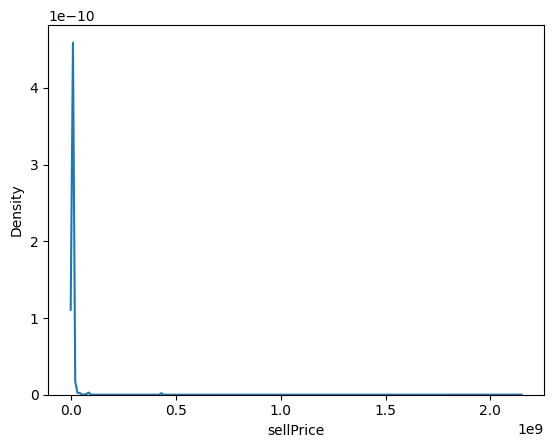

In [3]:

sns.kdeplot(data['sellPrice'])

<AxesSubplot:ylabel='sellPrice'>

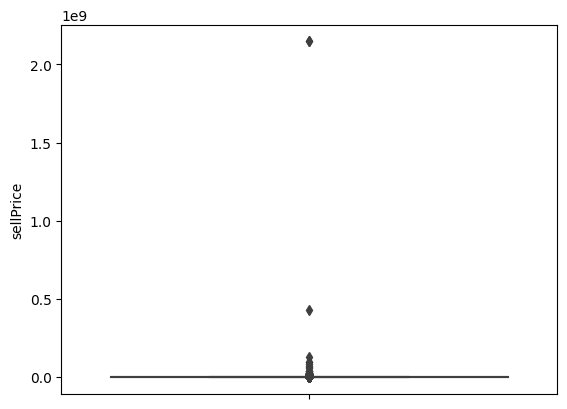

In [4]:
sns.boxplot(y=data['sellPrice'])

Plotting the density distribution and viewing the distribution of the dependent variable shows that the dependent variable does not obey a normal distribution and has a significant right skew.

Plotting a box plot to see if there are outliers. it is clear that there are some values in the dependent variable that are large, and these values may be outliers, which can be subsequently removed.

## Data Preprocessing

In [5]:
data['year'] = pd.to_datetime(data['Date']).dt.year # Convert Date to year
data= data.drop(labels=['Id','Date'], axis=1) # Delete the Id and Date columns
data

,suburb,postalCode,sellPrice,bed,bath,car,propType,year
0,Avalon Beach,2107,1210000,4.0,2,2.0,house,2019
1,Avalon Beach,2107,2250000,4.0,3,4.0,house,2019
2,Whale Beach,2107,2920000,3.0,3,2.0,house,2019
3,Avalon Beach,2107,1530000,3.0,1,2.0,house,2019
4,Whale Beach,2107,8000000,5.0,4,4.0,house,2019
...,...,...,...,...,...,...,...,...
199499,Illawong,2234,1900000,5.0,3,7.0,house,2014
199500,Illawong,2234,980000,4.0,3,2.0,house,2014
199501,Alfords Point,2234,850000,4.0,2,2.0,house,2014
199502,Illawong,2234,640000,3.0,2,2.0,townhouse,2013


In [6]:
data['postalCode'] = data['postalCode'].astype(str)
postalCode_save = data['postalCode'].value_counts()[data['postalCode'].value_counts()>100].index.tolist()
data['postalCode'] = data['postalCode'].apply(lambda x:'Other' if x not in postalCode_save else x)

suburb_save = data['suburb'].value_counts()[data['suburb'].value_counts()>100].index.tolist()
data['suburb'] = data['suburb'].apply(lambda x:'Other' if x not in suburb_save else x)

data

,suburb,postalCode,sellPrice,bed,bath,car,propType,year
0,Avalon Beach,2107,1210000,4.0,2,2.0,house,2019
1,Avalon Beach,2107,2250000,4.0,3,4.0,house,2019
2,Other,2107,2920000,3.0,3,2.0,house,2019
3,Avalon Beach,2107,1530000,3.0,1,2.0,house,2019
4,Other,2107,8000000,5.0,4,4.0,house,2019
...,...,...,...,...,...,...,...,...
199499,Illawong,2234,1900000,5.0,3,7.0,house,2014
199500,Illawong,2234,980000,4.0,3,2.0,house,2014
199501,Other,2234,850000,4.0,2,2.0,house,2014
199502,Illawong,2234,640000,3.0,2,2.0,townhouse,2013


Because there are too many categories in the postalCode and suburb. Therefore, if the number of occurrences is not greater than 100, the categories are recorded as other to prevent too many categories from overfitting the model.

In [7]:
data.isna().sum()/data.shape[0]*100

suburb        0.000000
postalCode    0.000000
sellPrice     0.000000
bed           0.077191
bath          0.000000
car           9.098063
propType      0.000000
year          0.000000
dtype: float64

In [8]:
data = data.dropna() # Remove missing values
data 

,suburb,postalCode,sellPrice,bed,bath,car,propType,year
0,Avalon Beach,2107,1210000,4.0,2,2.0,house,2019
1,Avalon Beach,2107,2250000,4.0,3,4.0,house,2019
2,Other,2107,2920000,3.0,3,2.0,house,2019
3,Avalon Beach,2107,1530000,3.0,1,2.0,house,2019
4,Other,2107,8000000,5.0,4,4.0,house,2019
...,...,...,...,...,...,...,...,...
199499,Illawong,2234,1900000,5.0,3,7.0,house,2014
199500,Illawong,2234,980000,4.0,3,2.0,house,2014
199501,Other,2234,850000,4.0,2,2.0,house,2014
199502,Illawong,2234,640000,3.0,2,2.0,townhouse,2013


In [9]:
data = data[data['sellPrice']<10000000] # Remove some outliers
data

,suburb,postalCode,sellPrice,bed,bath,car,propType,year
0,Avalon Beach,2107,1210000,4.0,2,2.0,house,2019
1,Avalon Beach,2107,2250000,4.0,3,4.0,house,2019
2,Other,2107,2920000,3.0,3,2.0,house,2019
3,Avalon Beach,2107,1530000,3.0,1,2.0,house,2019
4,Other,2107,8000000,5.0,4,4.0,house,2019
...,...,...,...,...,...,...,...,...
199499,Illawong,2234,1900000,5.0,3,7.0,house,2014
199500,Illawong,2234,980000,4.0,3,2.0,house,2014
199501,Other,2234,850000,4.0,2,2.0,house,2014
199502,Illawong,2234,640000,3.0,2,2.0,townhouse,2013


In [10]:
data_onehot = pd.get_dummies(data, drop_first=True) # one hot encoder to convert numerical variables
data_onehot

,sellPrice,bed,bath,car,year,suburb_Abbotsford,suburb_Alexandria,suburb_Allambie Heights,suburb_Allawah,suburb_Ambarvale,...,postalCode_2770,postalCode_2777,postalCode_Other,propType_duplex/semi-detached,propType_house,propType_other,propType_terrace,propType_townhouse,propType_villa,propType_warehouse
0,1210000,4.0,2,2.0,2019,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2250000,4.0,3,4.0,2019,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2920000,3.0,3,2.0,2019,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1530000,3.0,1,2.0,2019,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,8000000,5.0,4,4.0,2019,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199499,1900000,5.0,3,7.0,2014,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
199500,980000,4.0,3,2.0,2014,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
199501,850000,4.0,2,2.0,2014,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
199502,640000,3.0,2,2.0,2013,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Modeling

In [11]:
X = data_onehot.drop(labels=['sellPrice'], axis=1)
y = data_onehot['sellPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [13]:
y_pred = rf.predict(X_test)
print(f'The RMSE is {np.sqrt(mean_squared_error(y_pred, y_test))} on the test set')
print(f'The MAE is {mean_absolute_error(y_pred, y_test)} on the test set')
print(f'The R square is {r2_score(y_pred, y_test)} on the test set')

The RMSE is 482493.57168692775 on the test set
The MAE is 243621.17799923246 on the test set
The R square is 0.6081344993541805 on the test set


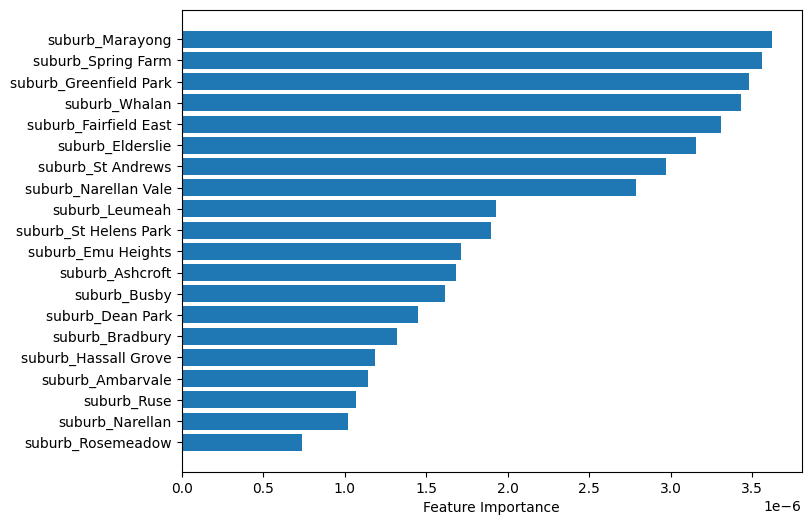

In [14]:
plt.figure(figsize=(8,6))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx][0:20], rf.feature_importances_[sorted_idx][0:20])
plt.xlabel("Feature Importance")
plt.show()

## Description of Analysis
1) Plotting the density distribution and viewing the distribution of the dependent variable shows that the dependent variable does not obey a normal distribution and has a significant right skew. Plotting a box plot to see if there are outliers. it is clear that there are some values in the dependent variable that are large, and these values may be outliers, which can be subsequently removed.

2) Because there are too many categories in the postalCode and suburb. Therefore, if the number of occurrences is not greater than 100, the categories are recorded as other to prevent too many categories from overfitting the model.

3) Training and evaluating a Random Forest regression model.

4) Draw a graph show the importance of feature about subrub in Sydney.

## Conclusion
In this project, I am using regression, supervised. 

For the model part, I am using random forest. Random Forest is a powerful machine learning model that leverages the concept of ensemble learning to improve the accuracy and robustness of predictions based on decision trees. A decision tree is a simple, yet effective, machine learning model that employs a tree-like model of decisions. However, it tends to overfit the training data, meaning it may perform well on the training data but poorly on new, unseen data. Random Forest mitigates this by creating a 'forest' of different decision trees during training, each built on a random subset of the training data. This approach of building multiple models is known as ensemble learning. Each tree in the forest gets a vote on the output prediction, and the most voted prediction is chosen as the final output. This method not only reduces the overfitting problem common with single decision trees but also improves the accuracy of predictions as it averages the results of all individual trees, thereby reducing the variance. Moreover, Random Forest is robust to outliers and noise in the data. Since it builds multiple trees on random data subsets, the impact of any outlier or noisy data is reduced as it's unlikely to influence all the trees in the forest. In addition, Random Forest can handle both regression and classification tasks, and it provides a good indicator of the importance it assigns to your inputs. For instance, it can rank the importance of each feature on the prediction, which can be very useful for feature selection in a data science workflow.

Before only considering suburd related to house price, I only consider bed, bath, car but the R^2 will become around 20%. The value is really low. Which mean these features are not very important for house price. When the model only consider suburd, the R^2 increase to 60%. This significantly showed that suburd is more important causing house price change.

The R square is 0.6081344993541805 on the test set which means the model can predict 60.81% of the house pricing. We can see from the graph that Marayong, Spring Farm and Greenfield Pard are the top three importance places in suburd.

The result is kind of suprising. Before see the result, I guess that bedroom number, bathroom number and car spot will have large R^2 and they will be the main reason for a high house price. However in Sydney, these are all not important as suburd. May be in the furture, I will try to investigate housing price in different country. Are they all related to location.